## Forces for a Triangluar Camming Device

Approximation of a Tricam. 

It is simplest to start modeling the tricam as a triangle with the force applied straight down from the top. It's not clear that this simplification is warranted, but it gives a chance to get some results for a similar shaped object and similar mode of camming.

Unlike the SLCD in symmetric placement, because of the lack of symmetry, we have an underconstrained system (thanks to @RadostW for pointing this out).

In order to give the simplified rigid body FBD enough constraints to be solved, a coefficient of friction $\mu$ is used for the right side to relate $F_n$ and $F_{R,y}$. 

$
F_{R,y} = \mu F_n
$ 

It's not clear that this choice is entirely warranted, though it allows the calculation to proceed. Another approach would be to fix the reactive force from the right wall to be normal to base of the triangle (also not clearly warranted, but interesting). A finite element model of the system with accurate boundary conditions would likely be the way to fully model the system. Anyone have a 3D model of a Tricam? Any research findings out there?

It is assumed that the left side is a fixed pivot point for the initial calculation (e.g. assume we are guaranteed no slipping on the left). This makes the model simpler to work with. After computing the forces, the required "equivalent" minimal coefficient of friction $\mu_l$ for the left side to maintain non-slipping is calculated. We can require $\mu_l \leq \mu$ guaranteeing at least as much frictional force without slipping is available on the left as right. 

This simplified model is sufficient to generate some data points that can be tested.

<img src="triangle_force_diagram.png" alt="Triangular Cam" width="600"/>

Below is a modification where $F_a$ moved to act on the right surface. This is closer to an actual tricam.

### Equation setup in Sympy

In [1]:
# Setup for a triangle 
# Assume left end is a pivot point.
# F_L is force on left end. F_R is force on right end.

# Imports for all code in this file
import sympy as sp
import numpy as np
from sympy import init_printing
from IPython.display import display
import matplotlib.pyplot as plt
from cam_force_utilities import draw_triangle, calculate_triangle_angles, plot_sympy_expression

# Set up nice printing in sympy
init_printing()

# Define the variables
F_L_y, F_R_y, F_a = sp.symbols('F_L_y F_R_y F_a')
F_n = sp.symbols('F_n')
r1, r2, theta1, theta2, mu = sp.symbols('r1 r2 t_1 t_2 µ')

# Define the equations
eq1 = sp.Eq(F_L_y + F_R_y - F_a, 0) # vertical force balance
eq2 = sp.Eq(r1 * (F_R_y - F_a) * sp.cos(theta1) + r1 * F_n * sp.sin(theta1), 0) # torque balance
eq3 = sp.Eq(F_R_y, mu * F_n)  # in order to be able to solve, need an additional contraint. Use friction force.

display(eq1, eq2, eq3)

### Solution

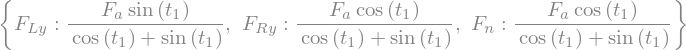

In [2]:
# Solve the system of equations
solution = sp.solve([eq1, eq2, eq3], (F_L_y, F_R_y, F_n))

solution

In [3]:
F_n_solution = solution[F_n]
F_L_y_solution = solution[F_L_y]
F_R_y_solution = solution[F_R_y]
sp.simplify(F_R_y_solution + F_L_y_solution) # check force balance in vertical direction.


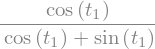

In [4]:
# force multiplier
F_mult = F_n_solution / F_a
F_mult

In [10]:
# apparent coeff. of friction on left/right side:
mu_l = sp.simplify(F_L_y_solution / F_n_solution)
mu_l

### Test particular values for $\theta_1, \theta_2, r_1, r_2, \mu$

(It seems the coeff. of friction for aluminum on granite is somewhere between 0.4 and 0.6 can anyone confirm?)

In [6]:
th1_val = np.round(np.radians(10), 3) # 10 degrees
th2_val = np.round(np.radians(60), 3) # 60 degrees 
subs_dict = {theta1: th1_val, theta2: th2_val, mu: 0.5, F_a:12, r1:2, r2:3}

In [7]:
display(subs_dict)

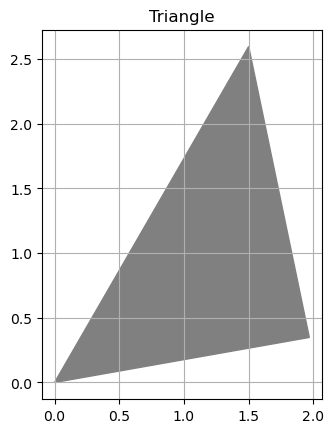

In [8]:
draw_triangle(subs_dict[r1], subs_dict[theta1], subs_dict[r2], subs_dict[theta2])

In [11]:
from IPython.display import display, Math

F_L_y_val = float(solution[F_L_y].subs(subs_dict).evalf())
F_R_y_val = float(solution[F_R_y].subs(subs_dict).evalf())
F_n_val =  float(solution[F_n].subs(subs_dict).evalf())
F_mult_val = float(F_mult.subs(subs_dict).evalf())
mu_l_val = float(mu_l.subs(subs_dict).evalf())

latex_str = fr"""
F_{{Ly}} = {F_L_y_val:.2f}, \quad 
F_{{Ry}} = {F_R_y_val:.2f}, \quad 
F_n = {F_n_val:.2f}, \quad
F_{{\text{{mult}}}} = {F_mult_val:.2f}, \quad
\mu_l = {mu_l_val:.2f}
"""
display(Math(latex_str))

<IPython.core.display.Math object>

- **Note this gives a force multiplier of 1.32 compared to 2 for a SLCD** 

- *However, the geometry of this triangle does not match exactly a tricam, and there are some subtleties in the way the cam strap acts on the device. I have found that for a variety of triangle geometries the outward force multiplier appears to be consistently less than 2*.

### Right side force explorations
Find the angle that bisects the angle of the triangle that is in contact with the right side. Use this as the force direction. The idea is that the force will somehow balance between the angles. This is not justified by anything. Just curious to see what results it gives. 

In [11]:
angles_rad, _ = calculate_triangle_angles(subs_dict[r1], subs_dict[theta1], subs_dict[r2], subs_dict[theta2])
angle_right_side = angles_rad[1]

print(f"right side angle: {np.rad2deg(angle_right_side)}")

beta = subs_dict[theta1] + angle_right_side / 2
split_force_decomp = np.tan(beta)
mu_split_force = 1 / split_force_decomp
print(f"split force angle: beta = {np.rad2deg(beta)}")
print(f"force decomposition: F_R,y / F_R,x = tan(beta)) = {split_force_decomp}")
print(f"implies µ_r = F_R,x / F_R,y = 1/tan(beta) = {mu_split_force}")

right side angle: 91.7305430004448
split force angle: beta = 55.89203291501181
force decomposition: F_R,y / F_R,x = tan(beta)) = 1.4765515236828177
implies µ_r = F_R,x / F_R,y = 1/tan(beta) = 0.6772537117470835


In [12]:
subs_dict[theta1]

In [13]:
angle_right_side

In [14]:
def calculate_triangle_angles(r1, theta1, r2, theta2, decimals=3):
    """
    Calculate the angles of the triangle formed by two vectors (r1, theta1) and (r2, theta2)
    with a third side connecting the endpoints of the vectors.
    
    Parameters:
    r1 (float): Magnitude of the first vector.
    theta1 (float): Angle of the first vector in radians.
    r2 (float): Magnitude of the second vector.
    theta2 (float): Angle of the second vector in radians.
    decimals (int): Number of decimal places to round the results to.
    
    Returns:
    tuple: Two numpy arrays containing the angles of the triangle, 
           one in radians and the other in degrees, rounded to the specified decimal places.
    """
    # Convert the vectors from polar to Cartesian coordinates
    x1, y1 = r1 * np.cos(theta1), r1 * np.sin(theta1)
    x2, y2 = r2 * np.cos(theta2), r2 * np.sin(theta2)
    
    print(f"x1 = {x1}, y1 = {y1}")
    print(f"x2 = {x2}, y2 = {y2}")
    
    # Calculate the angle at the origin
    angle_A = abs(theta2 - theta1)
    
    # Calculate the vector from the endpoint of the first vector to the endpoint of the second vector
    x3, y3 = x2 - x1, y2 - y1
    
    print(f"x3 = {x3}, y3 = {y3}")
    # Calculate the angle of this new vector using absolute values of x3, y3.
    theta3 = np.arctan2(abs(y3), abs(x3))
    
    # Calculate the other two angles
    angle_B = abs(theta1 - theta3)
    angle_C = abs(theta2 - theta3)
    
    # Ensure the angles are within the correct range
    angle_A = angle_A % (2 * np.pi)
    angle_B = angle_B % (2 * np.pi)
    angle_C = angle_C % (2 * np.pi)
    
    # Create numpy arrays for the angles in radians and degrees
    angles_radians = np.array([angle_A, angle_B, angle_C])
    angles_degrees = np.degrees(angles_radians)
    
    # Round the results to the specified number of decimal places
    angles_radians_rounded = np.round(angles_radians, decimals=decimals)
    angles_degrees_rounded = np.round(angles_degrees, decimals=decimals)
    
    return angles_radians_rounded, angles_degrees_rounded


In [15]:
display(subs_dict)

In [16]:
_, angles_deg = calculate_triangle_angles(subs_dict[r1], subs_dict[theta1], subs_dict[r2], subs_dict[theta2])

x1 = 1.969453077809867, y1 = 0.3482162751871919
x2 = 1.5005132237912102, y2 = 2.597779833863468
x3 = -0.4689398540186567, y3 = 2.249563558676276


In [17]:
angles_deg

array([49.962, 68.198, 18.236])

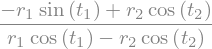

In [18]:
mu_l

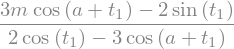

In [19]:
r1_val = 2
r2_val = 3
alpha, m = sp.symbols("a m")
mu_l_fcn = mu_l.subs({r1:r1_val, r2:r2_val, mu:m, theta2:(theta1 + alpha)})
mu_l_fcn

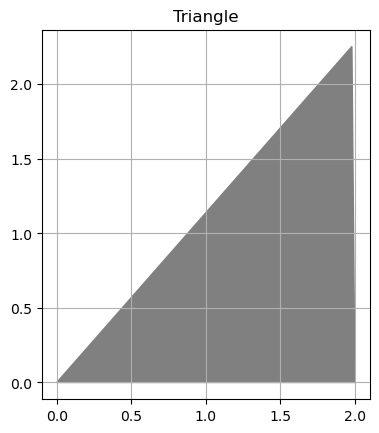

a_val = 0.85


In [20]:
a_val = 0.85#np.round(np.radians(50), 3)
t_val = np.radians(0)
draw_triangle(r1_val, t_val, r2_val, a_val)
print(f"a_val = {a_val}")

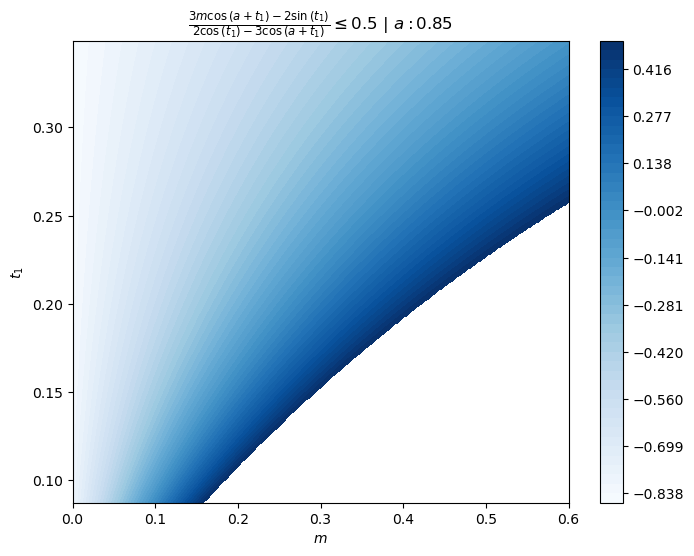

In [23]:
plot_sympy_expression(mu_l_fcn, m, theta1, (0, 0.6), (np.radians(5), np.radians(20)), {alpha:0.85}, below=0.5)

## Hertzian Contact Code

This section calculates and visualizes the **contact area** and **pressure distribution** for a **cylindrical section** (representing the vertex of a triangular wedge) in contact with a **flat surface**. The code is based on **Hertzian contact theory**, specifically for the case of a **cylinder-flat contact**.

## Key Variables and Assumptions
- **$R$**: Radius of curvature of the cylindrical section.
- **$L$**: Length (or height) of the cylindrical section in the $z$-direction.
- **$F_n$**: Normal force applied to the body in newtons.
- **$E_{\text{Al}}$, $\nu_{\text{Al}}$**: Young's modulus and Poisson's ratio for aluminum.
- **$E_{\text{Granite}}$, $\nu_{\text{Granite}}$**: Young's modulus and Poisson's ratio for granite.
- **$E^*$**: The **effective modulus**, which accounts for the elastic properties of both materials.

## Steps in the Code

### 1. **Effective Modulus Calculation**
The **effective modulus** $E^*$ is computed as:

$
\frac{1}{E^*} = \frac{1 - \nu_{\text{Al}}^2}{E_{\text{Al}}} + \frac{1 - \nu_{\text{Granite}}^2}{E_{\text{Granite}}}
$

This accounts for the elasticity of both the aluminum (triangle) and granite (flat surface).

### 2. **Contact Width Calculation**
The **half-width** of the contact area $a$ is computed using the formula:

$
a = \sqrt{\frac{2 F_n R}{\pi L E^*}}
$

This gives the distance from the center of the contact area to the edge in the plane perpendicular to the cylindrical section.

### 3. **Maximum Pressure Calculation**
The **maximum pressure** at the center of the contact area, $p_0$, is given by:

$
p_0 = \frac{2 F_n}{\pi a L}
$

### 4. **Pressure Distribution**
The **pressure distribution** across the contact area is calculated using:

$
p(x) = p_0 \left(1 - \frac{x^2}{a^2}\right)^{1/2}
$

Where $x$ is the distance from the center of the contact area, and $p(x)$ is the pressure at that point.

### 5. **Visualization**
The contact pressure $p(x)$ is plotted over the contact width $[-a, a]$, showing how the pressure is highest at the center and decreases toward the edges.

## Output
- The script prints the **contact half-width** $a$ and the **maximum pressure** $p_0$.
- It generates a plot of the **pressure distribution** across the contact area.


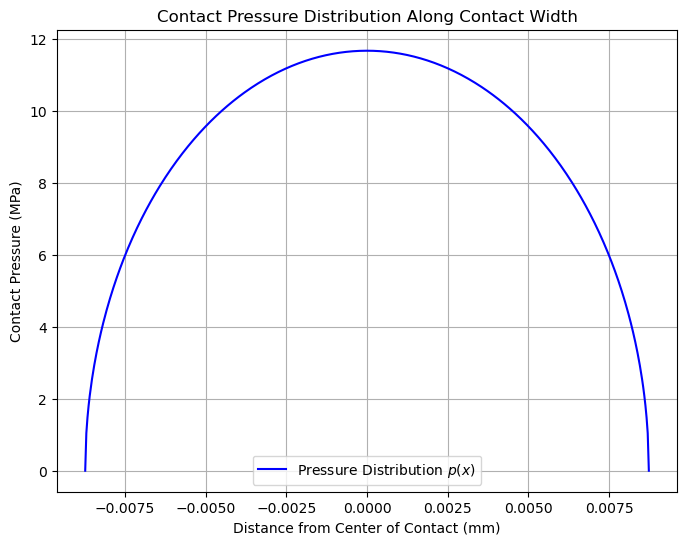

Contact half-width a: 0.0087 mm
Maximum contact pressure p_0: 11.6616 MPa


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the problem
R = 25 * 1e-3  # Radius of curvature in meters (from mm)
L = 2.5 * 1e-2  # Length/height of the cylindrical section in meters (from cm)
F_n = 4  # Normal force in Newtons (adjustable)

# Material properties
E_Al = 69e9  # Young's modulus for aluminum in Pa
nu_Al = 0.33  # Poisson's ratio for aluminum
E_Granite = 55e9  # Young's modulus for granite in Pa
nu_Granite = 0.25  # Poisson's ratio for granite

# Effective modulus calculation
E_star = 1 / ((1 - nu_Al**2) / E_Al + (1 - nu_Granite**2) / E_Granite)

# Contact width calculation (half-width a)
a = np.sqrt((2 * F_n * R) / (np.pi * L * E_star))

# Maximum pressure calculation
p_0 = (2 * F_n) / (np.pi * a * L)

# Generate x values for pressure distribution across contact width [-a, a]
x_vals = np.linspace(-a, a, 500)

# Pressure distribution across the contact width
p_x = p_0 * np.sqrt(1 - (x_vals / a)**2)

# Plotting the pressure distribution
plt.figure(figsize=(8, 6))
plt.plot(x_vals * 1e3, p_x * 1e-6, label='Pressure Distribution $p(x)$', color='b')
plt.xlabel('Distance from Center of Contact (mm)')
plt.ylabel('Contact Pressure (MPa)')
plt.title('Contact Pressure Distribution Along Contact Width')
plt.grid(True)
plt.legend()
plt.show()

# Print contact width and maximum pressure
print(f"Contact half-width a: {a * 1e3:.4f} mm")
print(f"Maximum contact pressure p_0: {p_0 * 1e-6:.4f} MPa")


In [29]:
subs_dict

In [27]:
import numpy as np
import scipy.optimize as opt

# Define parameters
F_a_val = subs_dict[F_a]  # Applied vertical force (N)
mu_L_val = subs_dict[mu]  # Coefficient of friction on the left side
mu_R_val = subs_dict[mu]  # Coefficient of friction on the right side

# Convert polar coordinates to Cartesian
def polar_to_cartesian(r, alpha):
    return np.array([r * np.cos(alpha), r * np.sin(alpha)])

r1_val = subs_dict[r1]
r2_val = subs_dict[r2]
theta1_val = subs_dict[theta1]
theta2_val = subs_dict[theta2]

# v1_cartesian = polar_to_cartesian(r1, theta1_val)
# v2_cartesian = polar_to_cartesian(r2, theta2_val)

# Reaction force direction based on normal and friction forces
def reaction_force_angle(F_R_x, F_R_y):
    return np.arctan2(F_R_y, F_R_x)  # Angle of the total reaction force

# Deflection calculation based on normal force
def deflection(F_R_x, F_R_y, R, L, E_star):
    # Calculate the normal force F_n
    F_n = np.sqrt(F_R_x**2 + F_R_y**2)
    
    # Calculate the contact half-width a
    a = np.sqrt((2 * F_n * R) / (np.pi * L * E_star))
    
    # Compute the deflection delta
    delta = F_n * R / (2 * a * L * E_star)
    
    return delta

# Force balance equations
def force_balance(F_R_x, F_R_y, F_L_y, F_a, mu_L, mu_R):
    # Vertical force balance: F_a = F_L_y + F_R_y
    vertical_balance = F_L_y + F_R_y - F_a_val
    
    # Horizontal force balance: Normal forces must balance horizontally
    # Normal force on left side is is F_L_x. 
    # Coefficient of friction governs normal force as a function of vertical force:
    # F_L_y = mu_L * F_L_x => F_L_x = F_L_y / mu_L
    F_L_x = F_L_y / mu_L 
    horizontal_balance = F_L_x - F_R_x  # F_R_x is the normal force on the right
    
    return horizontal_balance, vertical_balance #, horizontal_balance

# Moment balance around the left side (origin)
def moment_balance(F_R_y, F_R_x, r1, r2, alpha1, alpha2, alpha_comp, R, L, E_star):
    # r1 and r2 are the distances from the pivot to the contact points
    # Compute lever arms (distances)    
    
    delta = deflection(F_R_x, F_R_y, R, L, E_star)
    delta_along_v1 = delta * (np.cos(alpha_comp) * np.cos(alpha1) + np.sin(alpha_comp) * np.sin(alpha1))

    # Perpendicular distance from F_R to pivot, taking into account compression
    lever_arm_R = r1 - delta_along_v1
    lever_arm_F_a = r2  # Lever arm for the applied force F_a
    
    # Moment balance: moment from F_R should balance the moment from F_a
    moment_R = lever_arm_R * (F_R_x * np.sin(alpha1) + F_R_y * np.cos(alpha1))
    moment_a = lever_arm_F_a * F_a_val * np.cos(alpha2)   
    moment = moment_a - moment_R
    print(f"  Delta along v1 or right lever arm = {delta_along_v1}")
    print(f"  Moment equation = {moment_a} - {moment_R}")
    print(f"  Adjusted lever arm = {lever_arm_R}")
    
    return moment

# Function to solve system of equations
def equations(variables):
    F_R_x, F_R_y, F_L_y = variables
    
    # Calculate the total reaction force angle based on components
    alpha_comp = reaction_force_angle(F_R_x, F_R_y)
    
    # Get force balance equations
    horizontal_balance, vertical_balance = force_balance(F_R_x, F_R_y, F_L_y, F_a, mu_L_val, mu_R_val)
    
    # Get moment balance equation
    moment_eq = moment_balance(F_R_y, F_R_x, r1_val, r2_val, theta1_val, theta2_val, alpha_comp, R, L, E_star)
    
    # Track values during iterations
    print(f"Iteration:")
    print(f"  F_R_x = {F_R_x}, F_R_y = {F_R_y}, F_L_y = {F_L_y}")
    print(f"  Vertical balance = {vertical_balance}")
    
    return [horizontal_balance, vertical_balance, moment_eq]

In [28]:
# Initial guesses for F_R_x, F_R_y
initial_guess = [F_a_val / 2, F_a_val / 2, F_a_val / 2]

# Solve the system of equations
solution = opt.fsolve(equations, initial_guess)
F_R_x_sol, F_R_y_sol, F_L_y_sol = solution

# Output results
print(f"Solution for forces: F_n = {F_R_x_sol:.2f} N, F_R_y = {F_R_y_sol:.2f} N, F_L_y = {F_L_y_sol:.2f} N")

# Calculate the final angle of deflection based on forces
alpha_compression_final = np.rad2deg(reaction_force_angle(F_R_x_sol, F_R_y_sol))
print(f"Final compression direction (deflection angle): {alpha_compression_final:.4f} degrees")
print(f"required coefficient {F_R_y_sol / F_R_x_sol}")

  Delta along v1 or right lever arm = 8.187288121333203e-06
  Moment equation = 18.006158685494523 - 13.905959191702065
  Adjusted lever arm = 1.9999918127118788
Iteration:
  F_R_x = 6.0, F_R_y = 6.0, F_L_y = 6.0
  Vertical balance = 0.0
  Delta along v1 or right lever arm = 8.187288121333203e-06
  Moment equation = 18.006158685494523 - 13.905959191702065
  Adjusted lever arm = 1.9999918127118788
Iteration:
  F_R_x = 6.0, F_R_y = 6.0, F_L_y = 6.0
  Vertical balance = 0.0
  Delta along v1 or right lever arm = 8.187288121333203e-06
  Moment equation = 18.006158685494523 - 13.905959191702065
  Adjusted lever arm = 1.9999918127118788
Iteration:
  F_R_x = 6.0, F_R_y = 6.0, F_L_y = 6.0
  Vertical balance = 0.0
  Delta along v1 or right lever arm = 8.187288194503475e-06
  Moment equation = 18.006158685494523 - 13.905959222834388
  Adjusted lever arm = 1.9999918127118055
Iteration:
  F_R_x = 6.000000089406967, F_R_y = 6.0, F_L_y = 6.0
  Vertical balance = 0.0
  Delta along v1 or right lever ar

In [30]:
equations([F_a_val/2, F_a_val/2, F_a_val/2])

  Delta along v1 or right lever arm = 8.187288121333203e-06
  Moment equation = 18.006158685494523 - 13.905959191702065
  Adjusted lever arm = 1.9999918127118788
Iteration:
  F_R_x = 6.0, F_R_y = 6.0, F_L_y = 6.0
  Vertical balance = 0.0
  Horizontal balance = 6.0


In [41]:
R